In [1]:
# 🔁 CELL 1: Fast Loader Function for .npz

import numpy as np

def load_pinn_npz(npz_file):
    print(f"📂 Loading {npz_file}...")
    data = np.load(npz_file, allow_pickle=True)
    return {
        'x': data['x'].squeeze(),
        'tt': data['tt'].squeeze(),
        'uu': data['uu'],
        'features': data.get('features', None),
        'mask': data.get('mask', None),
        'symbol': str(data['symbol']) if 'symbol' in data else "N/A",
        'expiry': str(data['expiry']) if 'expiry' in data else "N/A"
    }


In [3]:
# convert_mat_to_npz.py
import scipy.io
import numpy as np
import os

def convert_to_npz(mat_file):
    print(f"🔄 Converting {mat_file} to .npz...")
    mat = scipy.io.loadmat(mat_file)
    base = os.path.splitext(mat_file)[0]
    np.savez_compressed(f"{base}.npz", **mat)
    print(f"✅ Saved as {base}.npz")

# List all MAT files to convert
mat_files = [
    "PINN_TRAIN_DATA_20250529.mat",
    "EQT_PINN_TRAIN_DATA_20250529.mat"
]

for f in mat_files:
    convert_to_npz(f)


🔄 Converting PINN_TRAIN_DATA_20250529.mat to .npz...
✅ Saved as PINN_TRAIN_DATA_20250529.npz
🔄 Converting EQT_PINN_TRAIN_DATA_20250529.mat to .npz...
✅ Saved as EQT_PINN_TRAIN_DATA_20250529.npz


In [4]:
# 🔁 CELL 2: Load Both Option and Equity Files

# Choose expiry
expiry = "20250529"

# Load option and equity .npz
opt_data = load_pinn_npz(f"PINN_TRAIN_DATA_{expiry}.npz")
eqt_data = load_pinn_npz(f"EQT_PINN_TRAIN_DATA_{expiry}.npz")


📂 Loading PINN_TRAIN_DATA_20250529.npz...
📂 Loading EQT_PINN_TRAIN_DATA_20250529.npz...


In [5]:
# 📊 CELL 3: Quick Summary

def describe_data(name, data):
    print(f"🔍 {name} Summary:")
    print(f"Symbol: {data['symbol']}  | Expiry: {data['expiry']}")
    print(f"x: {data['x'].shape}, tt: {data['tt'].shape}, uu: {data['uu'].shape}")
    if data['features'] is not None:
        print(f"Features shape: {data['features'].shape}")
    print()

describe_data("OPTION", opt_data)
describe_data("EQUITY", eqt_data)


🔍 OPTION Summary:
Symbol: ['RELIANCE']  | Expiry: ['20250529']
x: (4866,), tt: (3,), uu: (3, 4866)
Features shape: (3, 4866, 7)

🔍 EQUITY Summary:
Symbol: ['RELIANCE']  | Expiry: ['20250529']
x: (20611,), tt: (20611,), uu: (1, 20611)
Features shape: (20611, 4)



/tmp/ipykernel_2004/2315015687.py:24: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/c/Meril/Python/1D_BS_SE_pinn-black-scholes-main/1dSE/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


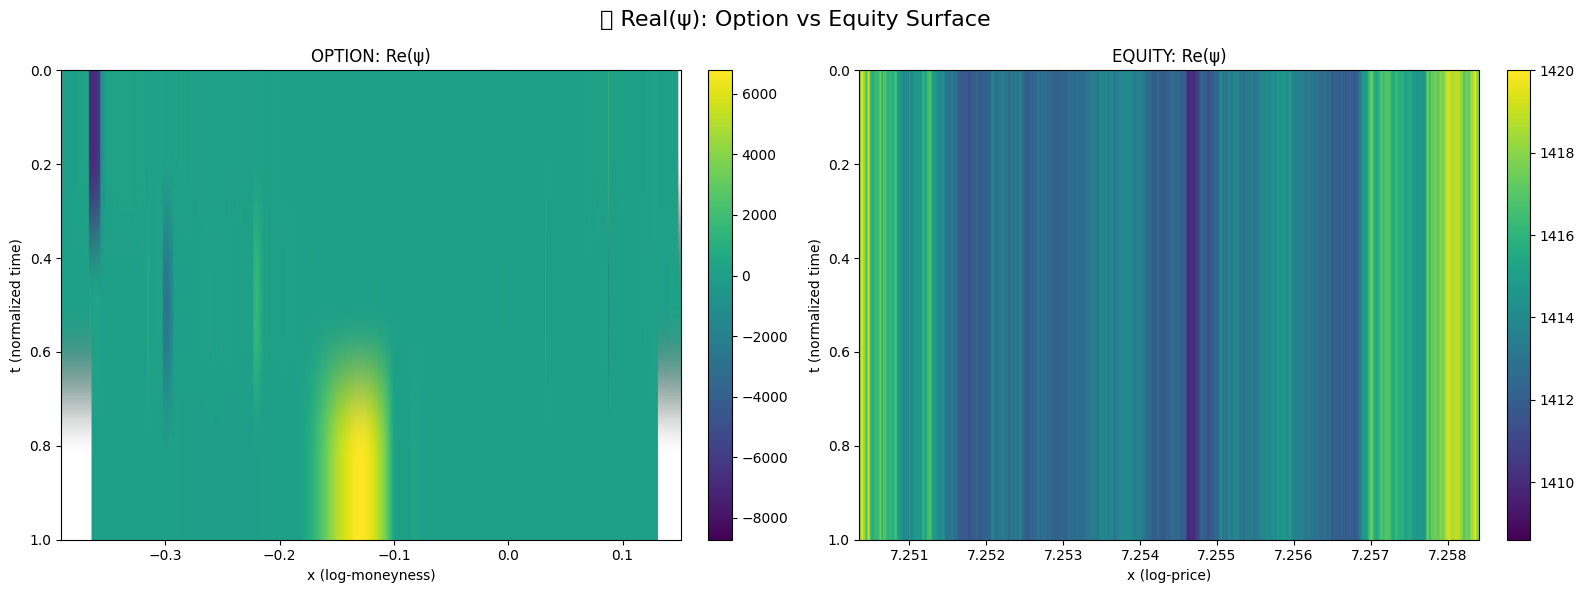

In [6]:
# 🖼️ CELL 4: Dual-Panel Visualization of Real(ψ) Surfaces

import matplotlib.pyplot as plt

def plot_real_surface(opt, eqt):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle("🔷 Real(ψ): Option vs Equity Surface", fontsize=16)

    x_opt, t_opt, uu_opt = opt['x'], opt['tt'], np.real(opt['uu'])
    x_eqt, t_eqt, uu_eqt = eqt['x'], eqt['tt'], np.real(eqt['uu'])

    axs[0].imshow(uu_opt, aspect='auto', cmap='viridis', extent=[x_opt.min(), x_opt.max(), t_opt.max(), t_opt.min()])
    axs[0].set_title("OPTION: Re(ψ)")
    axs[0].set_xlabel("x (log-moneyness)")
    axs[0].set_ylabel("t (normalized time)")

    axs[1].imshow(uu_eqt, aspect='auto', cmap='viridis', extent=[x_eqt.min(), x_eqt.max(), t_eqt.max(), t_eqt.min()])
    axs[1].set_title("EQUITY: Re(ψ)")
    axs[1].set_xlabel("x (log-price)")
    axs[1].set_ylabel("t (normalized time)")

    plt.colorbar(axs[0].images[0], ax=axs[0], fraction=0.046, pad=0.04)
    plt.colorbar(axs[1].images[0], ax=axs[1], fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

plot_real_surface(opt_data, eqt_data)


/tmp/ipykernel_2004/137581276.py:22: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/c/Meril/Python/1D_BS_SE_pinn-black-scholes-main/1dSE/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


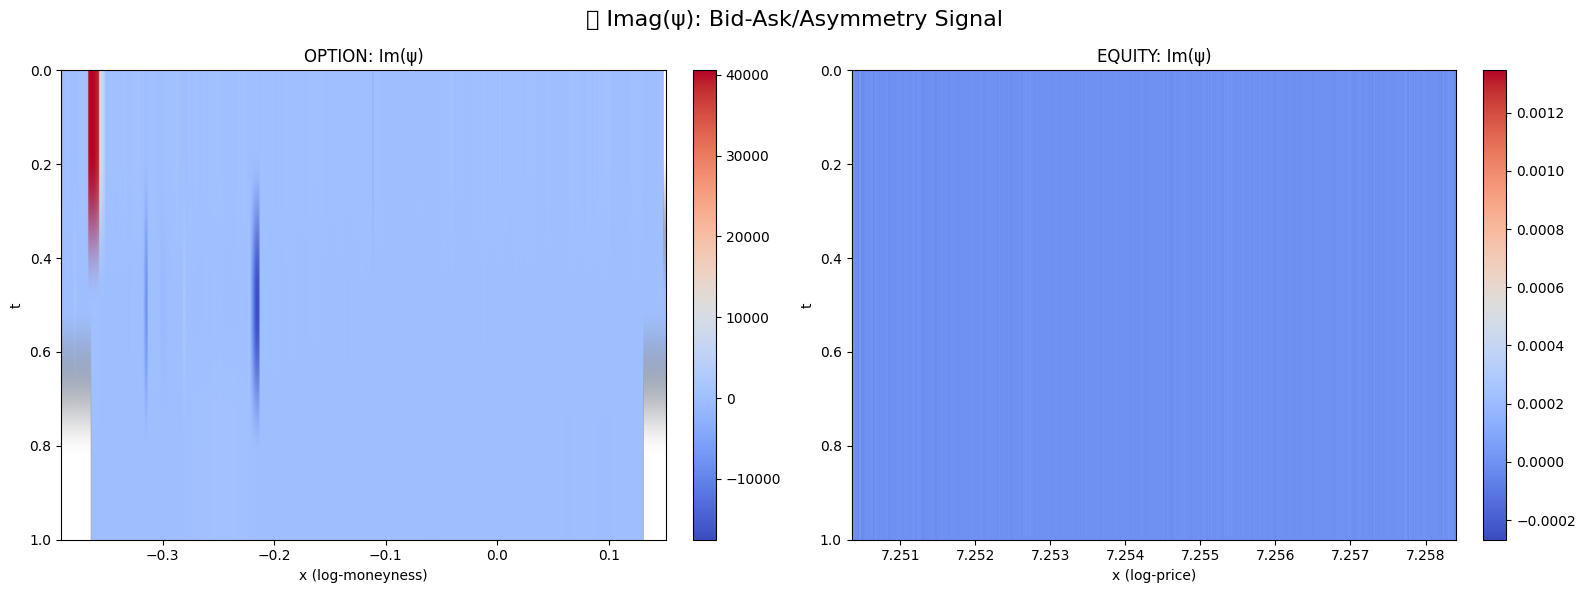

In [7]:
# 🌀 CELL 5: Dual-Panel Visualization of Imag(ψ) Surfaces

def plot_imag_surface(opt, eqt):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle("🔶 Imag(ψ): Bid-Ask/Asymmetry Signal", fontsize=16)

    x_opt, t_opt, uu_opt = opt['x'], opt['tt'], np.imag(opt['uu'])
    x_eqt, t_eqt, uu_eqt = eqt['x'], eqt['tt'], np.imag(eqt['uu'])

    axs[0].imshow(uu_opt, aspect='auto', cmap='coolwarm', extent=[x_opt.min(), x_opt.max(), t_opt.max(), t_opt.min()])
    axs[0].set_title("OPTION: Im(ψ)")
    axs[0].set_xlabel("x (log-moneyness)")
    axs[0].set_ylabel("t")

    axs[1].imshow(uu_eqt, aspect='auto', cmap='coolwarm', extent=[x_eqt.min(), x_eqt.max(), t_eqt.max(), t_eqt.min()])
    axs[1].set_title("EQUITY: Im(ψ)")
    axs[1].set_xlabel("x (log-price)")
    axs[1].set_ylabel("t")

    plt.colorbar(axs[0].images[0], ax=axs[0], fraction=0.046, pad=0.04)
    plt.colorbar(axs[1].images[0], ax=axs[1], fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

plot_imag_surface(opt_data, eqt_data)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

/mnt/c/Meril/Python/1D_BS_SE_pinn-black-scholes-main/1dSE/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/mnt/c/Meril/Python/1D_BS_SE_pinn-black-scholes-main/1dSE/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


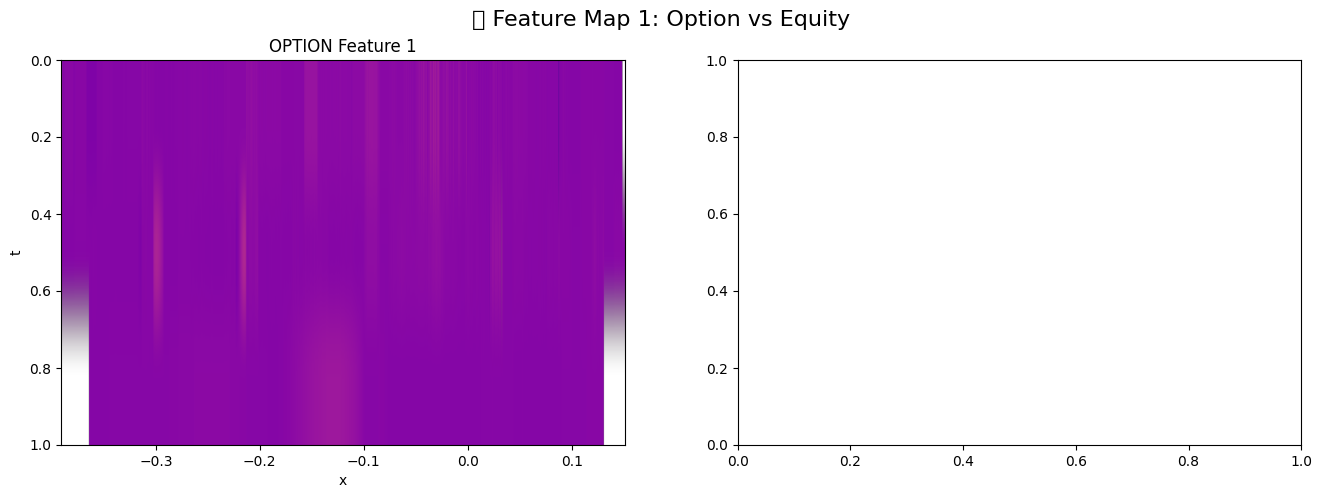

In [ ]:
# 🧠 CELL 6: Feature Map Comparison (First 3 Features)

def plot_feature_planes(opt, eqt, max_feat=3):
    opt_feat = opt['features']
    eqt_feat = eqt['features']
    if opt_feat is None or eqt_feat is None:
        print("⚠️ One of the feature tensors is missing.")
        return

    for i in range(min(max_feat, opt_feat.shape[2])):
        fig, axs = plt.subplots(1, 2, figsize=(16, 5))
        fig.suptitle(f"🧩 Feature Map {i+1}: Option vs Equity", fontsize=16)

        axs[0].imshow(opt_feat[:, :, i], aspect='auto', cmap='plasma',
                      extent=[opt['x'].min(), opt['x'].max(), opt['tt'].max(), opt['tt'].min()])
        axs[0].set_title(f"OPTION Feature {i+1}")
        axs[0].set_xlabel("x")
        axs[0].set_ylabel("t")

        axs[1].imshow(eqt_feat[:, :, i], aspect='auto', cmap='plasma',
                      extent=[eqt['x'].min(), eqt['x'].max(), eqt['tt'].max(), eqt['tt'].min()])
        axs[1].set_title(f"EQUITY Feature {i+1}")
        axs[1].set_xlabel("x")
        axs[1].set_ylabel("t")

        plt.colorbar(axs[0].images[0], ax=axs[0], fraction=0.046, pad=0.04)
        plt.colorbar(axs[1].images[0], ax=axs[1], fraction=0.046, pad=0.04)
        plt.tight_layout()
        plt.show()

plot_feature_planes(opt_data, eqt_data)


In [9]:
def plot_feature_planes(opt, eqt, max_feat=3):
    opt_feat = opt['features']
    eqt_feat = eqt['features']
    
    if opt_feat is None or eqt_feat is None:
        print("⚠️ One of the feature tensors is missing.")
        return

    # Determine if EQT features are 2D or 3D
    eqt_is_2d = (eqt_feat.ndim == 2)

    for i in range(min(max_feat, opt_feat.shape[2])):
        fig, axs = plt.subplots(1, 2, figsize=(16, 5))
        fig.suptitle(f"🧩 Feature Map {i+1}: Option vs Equity", fontsize=16)

        # Plot OPTION feature i
        axs[0].imshow(opt_feat[:, :, i], aspect='auto', cmap='plasma',
                      extent=[opt['x'].min(), opt['x'].max(), opt['tt'].max(), opt['tt'].min()])
        axs[0].set_title(f"OPTION Feature {i+1}")
        axs[0].set_xlabel("x")
        axs[0].set_ylabel("t")

        # Plot EQT feature i
        if not eqt_is_2d:
            eqt_img = eqt_feat[:, :, i]
            extent = [eqt['x'].min(), eqt['x'].max(), eqt['tt'].max(), eqt['tt'].min()]
        else:
            # Plot as 2D image: treat columns as features
            if i >= eqt_feat.shape[1]:
                print(f"⚠️ EQT feature {i+1} not available.")
                continue
            eqt_img = eqt_feat[:, i].reshape(-1, 1)  # stretch into a column
            extent = [0, 1, eqt['tt'].max(), eqt['tt'].min()]

        axs[1].imshow(eqt_img, aspect='auto', cmap='plasma', extent=extent)
        axs[1].set_title(f"EQUITY Feature {i+1}")
        axs[1].set_xlabel("x")
        axs[1].set_ylabel("t")

        plt.colorbar(axs[0].images[0], ax=axs[0], fraction=0.046, pad=0.04)
        plt.colorbar(axs[1].images[0], ax=axs[1], fraction=0.046, pad=0.04)
        plt.tight_layout()
        plt.show()
